# PART 1 - Machine Learning

### Task 1.1 - Data Preparation
There are 100 rows and 11 dimensions in the dataset. The data is 100% dense. Feature labels were added.

Task is to predict the number of containers a ship can carry. 
The target is known hence this is supervised learning.

From the inputs we want to get a output of the weighted sum : 𝑦 = 𝑓(𝑥𝑤)

- Import necessary modules and Read data,add feature names
- Call the head method to get a general overview of the data

In [5]:
#Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cols = ["IMO_NO.", "Vessel_Name", "Year_Built", "Gross_Tonnage", "Deadweight_Tonnage", "Length", "Beam", "Capacity_(TEU)", "Forward_Bays", "Center_Bays", "Aft_Bays"]
data = pd.read_csv('containers.csv',names=cols)
data.head()



,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2


- **Explore the data**

Our first step is to summarize the DataFrame by  computing aggregations. We can do this by using the info method in Pandas. We can see that all data is non-null as expected and we have 8 numeric values, one target, and one String.

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IMO_NO.             100 non-null    int64  
 1   Vessel_Name         100 non-null    object 
 2   Year_Built          100 non-null    int64  
 3   Gross_Tonnage       100 non-null    int64  
 4   Deadweight_Tonnage  100 non-null    int64  
 5   Length              100 non-null    float64
 6   Beam                100 non-null    float64
 7   Capacity_(TEU)      100 non-null    int64  
 8   Forward_Bays        100 non-null    int64  
 9   Center_Bays         100 non-null    int64  
 10  Aft_Bays            100 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 8.7+ KB


,IMO_NO.,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
count,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.457695e+06,2009.29000,103460.380000,107838.850000,313.804100,46.033200,9721.430000,10.980000,3.760000,3.790000
std,2.645332e+05,7.05003,60777.083352,57016.601909,71.138278,26.519082,6079.659143,3.074759,5.140687,1.640984
min,8.201648e+06,1982.00000,6191.000000,7979.000000,127.940000,19.200000,686.000000,6.000000,0.000000,0.000000
25%,9.310704e+06,2006.00000,55350.250000,67245.000000,278.455000,36.055000,5002.750000,8.000000,0.000000,4.000000
50%,9.446524e+06,2010.00000,94209.500000,104034.000000,332.675000,45.620000,8641.000000,11.000000,0.000000,4.000000
75%,9.687781e+06,2014.00000,149213.500000,150710.500000,366.155000,51.060000,13938.000000,14.000000,10.000000,5.000000
max,9.869186e+06,2021.00000,232311.000000,232606.000000,400.000000,286.670000,23964.000000,17.000000,14.000000,10.000000


**Finding outliers and inconsistent data** 

For each of these features, comparing the max and 75% values, we can start to see a huge difference in the Beam (Width) feature. This confirms that there may be an error with some of the tuples. 

In [8]:
print(data['IMO_NO.'].value_counts())

IMO_NO.
9314947    2
9260421    1
9298997    1
9454436    1
9631981    1
          ..
9619438    1
9618276    1
9444273    1
9236470    1
9795610    1
Name: count, Length: 99, dtype: int64


**Duplicate Vessel Identification Number (IMO)**

Now lets count the vessel identification number, which should be unique for the given dataset, however we can easily spot a duplicate IMO vessel. An online search shows that this vessel was renamed/purchased, we will leave in this duplicate vessel. IMO No. 9314947 in the dataset.

Let us investigate further.

Let’s have a quick look at the distribution of the Beam feature by plotting the histograms.

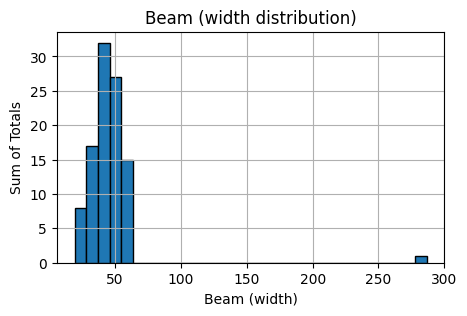

In [9]:

# for col in data.iloc[:,2:11]:
data['Beam'].hist(figsize=(5, 3), bins=30, edgecolor="black", )
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.title('Beam (width distribution)')
plt.xlabel('Beam (width)')
plt.ylabel("Sum of Totals")
plt.show()

**Fix the outlier, incorrect data**

Here we can see one ship has a length and width of 300x290 meters. I've never seen a almost square vessel before, probably doesn't go very fast!  The outlier is identified as MSC Albany with IMO 9619438. Correct beam should be 48meters. (https://www.vesselfinder.com/vessels/details/9619438) Since we have good reason to believe this is factually incorrect data it would be appropriate to correct the Beam to 48 meters

In [12]:
# Find the outlier as index 32, width cannot be the same as the length of the ship.

print(data.loc[32])

IMO_NO.                  9619438
Vessel_Name           MSC ALBANY
Year_Built                  2013
Gross_Tonnage              94017
Deadweight_Tonnage        112516
Length                    299.18
Beam                      286.67
Capacity_(TEU)              8886
Forward_Bays                  14
Center_Bays                    0
Aft_Bays                       4
Name: 32, dtype: object


- Clean the data

In [17]:
corrected_beam_MSC_Albany = 48
edited_data = data.copy()
edited_data.at[32,'Beam'] = corrected_beam_MSC_Albany
edited_data.loc[32]
edited_data

,IMO_NO.,Vessel_Name,Year_Built,Gross_Tonnage,Deadweight_Tonnage,Length,Beam,Capacity_(TEU),Forward_Bays,Center_Bays,Aft_Bays
0,9260421,ANNA MAERSK,2003,93496,109000,352.60,42.80,8272,15,0,6
1,9461867,APL CHONGQING,2011,113735,122200,349.00,45.73,10106,15,0,5
2,9354404,BF EUPHORIA,2006,9962,11432,134.44,22.74,868,8,0,0
3,9343728,BREMEN EXPRESS,2008,93750,103567,335.06,42.87,8749,15,0,5
4,9314947,CAMELLIA,2006,28927,39200,222.15,30.04,2824,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...
95,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,2018,217673,202684,400.00,59.00,20776,7,13,4
96,9863340,HMM HELSINKI,2020,228283,232606,399.90,61.00,23964,7,13,4
97,9868352,HMM STOCKHOLM,2020,232311,229039,399.90,61.50,23820,7,13,4
98,9778820,MILAN MAERSK,2017,214286,190326,399.00,58.60,20568,6,13,5



* **Split the data (training & testing)**

- 75% Training data (Default)
- 25% Testing data (Default)
  A high traininset set of 75% will prevent overfitting*
  underfitting is too simple

* Shuffle the data

By default train_test_split method shuffle the Dataframe randomly prior to splitting, hence we do not need to shuffle beforehand. Shuffling the data ensures that there are no patterns or structure in the order of the data that could *bias the results* of the model. It also ensures that both the training and testing dataset contains a good generalization of the model and is representative of the overall distribution of the vessel data.

In [22]:

from sklearn.model_selection import train_test_split

X = edited_data.copy() # Copy prevents mutation of the original dataset incase we need to revert changes.
y = edited_data['Capacity_(TEU)'].copy() # Prevents mutation.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_Test_With_All_Columns = X_test.copy() # Keep a copy of the X_Test before dropping columns & Normalization below

# Log the number of training and testing data, you can see 75% for training,a nd 25% for testing.
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)



(75, 11) (25, 11) (75,) (25,)


  * Drop features that are not required to train the model, such as the target variable and the IMO_NO & Vessel_Name in order to lower dimension. 


In [23]:
cols_to_drop = ['IMO_NO.','Vessel_Name','Capacity_(TEU)']
X_train.drop(columns=cols_to_drop, axis=1, inplace=True) #Dropped cols
X_test.drop(columns=cols_to_drop, axis=1, inplace=True) #Dropped Cols

print(len(X_train)) # 75% Training data
print(len(X_test)) # 25% Testing data


75
25


**Normalize using StandardScaler**

Now let us normalize the data to ensure that the values share a common scale, this will reduce complexity and optimize the data for machine learning. In this case we will use the StandardScaler

In [24]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_Train = scaler.fit_transform(X_train)
scaled_X_Test = scaler.fit_transform(X_test)
print(scaled_X_Train) # Prints the scaled Training data



[[-1.16437434e-01 -4.89711249e-01 -4.93597795e-01 -1.45867695e-01
  -3.74390519e-01  1.01897426e+00 -7.53504069e-01  1.16247639e-01]
 [-6.45698500e-01 -6.46215267e-01 -6.24990165e-01 -5.24200907e-01
   4.61745004e-01  3.49862405e-02 -7.53504069e-01  6.97485832e-01]
 [ 1.20671523e+00  1.77514273e+00  1.53470725e+00  1.19346262e+00
   1.36941657e+00 -1.60499378e+00  1.98414047e+00  1.16247639e-01]
 [ 6.77454164e-01  6.97641161e-01  7.39093690e-01  7.54612868e-01
   6.53127134e-01 -9.49001775e-01  1.20195632e+00  1.16247639e-01]
 [ 5.45138898e-01  1.44161116e+00  1.46001017e+00  1.18088413e+00
   1.39078447e+00 -9.49001775e-01  1.20195632e+00  1.27872403e+00]
 [-1.16437434e-01 -1.57323778e+00 -1.72190953e+00 -2.41656577e+00
  -2.14421071e+00 -1.27699778e+00 -7.53504069e-01 -2.20870514e+00]
 [ 1.33903050e+00  6.70206643e-01  5.02294292e-01  6.93816803e-01
   6.15965556e-01 -9.49001775e-01  1.20195632e+00  1.16247639e-01]
 [ 1.07439996e+00  1.74421245e+00  1.49847951e+00  1.19430119e+00
   

### Our data is now prepared for Modeling

### TASK 1.2 REGRESSION

**Pipelines**

We will be training our model on 3 regression algorithm's mentioned below. In order to efficiently load the models and evaluate each of them. We can use *make_pipeline from sklearn.pipeline*.

- Random Forest (Decision Trees)
- Multi Layer Perceptron  (MLP)
- Support Vector Regression

In [33]:
# Load the required dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

* Set up pipelines for each algorithm

In [34]:
from sklearn.pipeline import make_pipeline

# Store all the pipeline inside a dictionary.
pipelines = {
    'Random_Forest': make_pipeline(RandomForestRegressor(random_state=0)),
    'Multi_Layer_Percepton' : make_pipeline(MLPRegressor(random_state=0)),
    'Support_Vector_Regression' : make_pipeline(SVR())
}


Each of the 3 algorithms contain tunable hyperparameters, instead of manually tuning parameter for our dataset, we can utilize sklearn GridSearchCV. 

GridSearchCV provides a exhaustive search *(2-10 mins depending on CPU power)* on our predefined parameters for each algorithm. This returns the best possible combination of hyperparameters for each of our 3 algorithms used.

In [35]:

#Set up a hyperparameter grid, the model will go through each of the parameters one by one in order to find the best convergence.

hyper_param_grid = {
    'Random_Forest': {
        'randomforestregressor__n_estimators':[50,100,200]
    },
    'Multi_Layer_Percepton' : {
        'mlpregressor__hidden_layer_sizes':[100],
        'mlpregressor__solver':['adam','lbfgs'],
        'mlpregressor__max_iter':[1000,10000,20000]
    },
    'Support_Vector_Regression': {
        'svr__kernel':['rbf','sigmoid'],

    }    
}

In [36]:
# import Grid Search CV

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError #Suppress warnings from stdout
import warnings #Import python warning package
from sklearn.exceptions import ConvergenceWarning # Disable Convergence Warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning,)

fit_model = {} #Dictionary that holds our models

for algo,pipeline in pipelines.items():
    try:
        model = GridSearchCV(pipeline,hyper_param_grid[algo], cv=10, n_jobs=1)
        print('Training started for',algo,'...')
        model.fit(scaled_X_Train,y_train)
        fit_model[algo] = model
        print (algo, 'has been fitted! 👏')
        print ("========================================")
    except NotFittedError as e:
        print ("Error detected")
        print(repr(e))

print("All Training has been completed!! 👏👏")

Training started for Random_Forest ...
Random_Forest has been fitted! 👏
Training started for Multi_Layer_Percepton ...
Multi_Layer_Percepton has been fitted! 👏
Training started for Support_Vector_Regression ...
Support_Vector_Regression has been fitted! 👏
All Training has been completed!! 👏👏


**TOP 10 CONTAINERS ORDERED BY PREDICTED CAPACITY**

In [41]:
predictions = {}
Top10 = X_Test_With_All_Columns.loc[:,cols_to_drop]
# for algo,pipeline in pipelines.items():
   # predictions[algo] = fit_model[algo].predict(scaled_X_Test)
   # Top10Combined[algo] = predictions[algo]
# print(Top10Combined.sort_values('Random_Forest', ascending=False).reset_index(drop=True).head(10))
Top10

,IMO_NO.,Vessel_Name,Capacity_(TEU)
26,9685334,MOL BRILLIANCE,10100
86,9695121,CSCL GLOBE,19100
2,9354404,BF EUPHORIA,868
55,9416965,NYK REMUS,4888
75,9467263,CSCL JUPITER,14074
93,9869186,HMM GARAM,16010
16,9448774,COSCO MALAYSIA,8500
73,9454436,CMA CGM MARCO POLO,16022
54,9468308,NYK ALTAIR,9592
95,9776418,CMA CGM ANTOINE DE SAINT EXUPERY,20776


In [ ]:
# RD_pred = fit_model['Random_Forest'].predict(scaled_X_Test)
# MLP_pred = fit_model['multi_layer_perc'].predict(scaled_X_Test)
# SVR_pred = fit_model['support_vector_regression'].predict(scaled_X_Test)

RD = X_Test_With_All_Columns.loc[:,cols_to_drop]
RD['RD Prediction'] = RD_pred
RD['MLP Prediction'] = MLP_pred
RD['SVR Prediction'] = SVR_pred
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(RD.sort_values('RD Prediction', ascending=False).reset_index(drop=True).head(10))
print(type(RD))
# print(pred[4])
# X_Test_With_All_Columns['Prediction'] = pred
# X_Test_With_All_Columns

Use R2 SCORE AND MAE
high r2 is better
low mae is better

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error



In [ ]:
for algo,model in fit_model.items():
    y_prediction = model.predict(X_test_Dropped)
    print(f'{algo}| R2 = {r2_score(y_test, y_prediction)} | MAE = {mean_absolute_error(y_test,y_prediction)} | MSE = {mean_squared_error(y_test,y_prediction)}')
    

In [ ]:
# X_test
X_Test_Unscaled = pd.DataFrame(scaler.inverse_transform(X_test).astype(int))
X_Test_Unscaled.columns = ['Year_Built','Gross_Tonnage','Deadweight_Tonnage','Length','Beam','Forward_Bays','Center_Bays','Aft_Bays']
X_Test_Unscaled = pd.concat([X_Test_Unscaled,])
# print('edidt date lengt ', len(edited_data))
# addedBack = X_Test_Unscaled.join(edited_data.set_index(edited_data.index)[cols_to_drop]).reindex(columns=edited_data.columns)
# print(addedBack)
addedBack = pd.concat(X_edited_data.loc[X_Test_Unscaled.index, cols_to_drop],left_index=True,right_index=True)
addedBack
df_test_unnormalized = pd.concat([X_Test_Unscaled.reset_index(drop=True), edited_data.loc[X_test.index, ['A', 'C']].reset_index(drop=True), pd.DataFrame({'A_pred': y_pred_unnormalized})], axis=1)